#**Deutsch-Jozsa Algorithm**

*prepared by Tee Hui En*

<br><br><br> <hr>

<h3><b> Deutsch's problem </b></h3>

Given a boolean function $f:\{0,1\} \rightarrow \{0, 1\}$, we say $f$ is balanced if $f(0) \neq f(1)$ and constant if $f(0) = f(1)$.

Given  $f:\{0,1\} \rightarrow \{0, 1\}$ as an oracle, that is we can evaluate it for an input by making queries but we can't look inside, the problem is to decide whether $f$ is constant or balanced.

<h3><b> Deutsch's algorithm </b></h3>

We construct a 2 qubit circuit.

- Set the second qubit to state $\lvert-\rangle$ by applying $X$ and $H$ gates.

- Apply $H$ to first qubit.

- Apply $U_f$.

- Apply $H$ to first qubit.

- Measure the first qubit. If it is 0 then $f$ is constant. If it is 1, then $f$ is balanced.
<hr>

<h3><b> Example 1 </b></h3>

In [1]:
!pip install qiskit qiskit[visualization] qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=7437a7dcffbc9fa3f99f251fe155dbdbcbb6b4eda17fbcbda085365f9066376d
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
from qiskit import QuantumCircuit

def oracle():

    oracle = QuantumCircuit(2)
    oracle.cx(0, 1)

    return oracle

The code above defines an oracle.
Using the steps described earlier, implement <b>Deutsch’s algorithm</b> to determine whether the given oracle corresponds to a constant or balanced function, and explain your result.

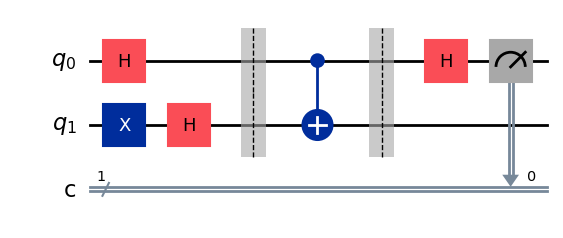

In [4]:
# Import required modules
from qiskit import QuantumCircuit
from qiskit_aer.primitives import SamplerV2 as AerSampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

# Create a 2-qubit, 1-classical-bit circuit
qc_deutsch = QuantumCircuit(2, 1)

# Set the second qubit to |1>
qc_deutsch.x(1)

# Apply Hadamard gates to both qubits
qc_deutsch.h(0)
qc_deutsch.h(1)

# Add oracle
qc_deutsch.barrier()
qc_deutsch.compose(oracle(), inplace=True)
qc_deutsch.barrier()

# Apply Hadamard to the first qubit
qc_deutsch.h(0)

# Measure the first qubit
qc_deutsch.measure(0, 0)

# Draw the circuit diagram
qc_deutsch.draw("mpl")

In [5]:
# Run the job
sampler_sim = AerSampler()
job = sampler_sim.run([qc_deutsch], shots=1000)
res = job.result()

# Analyse results
counts = res[0].data.c.get_counts()

print(counts)
if "1" in counts:
    print("balanced")
else:
    print("constant")

{'1': 1000}
balanced


<hr>

<h3><b> Generalisation </b></h3>

Now we can sort of generalise our function $f:\{0,1\}^n \rightarrow \{0,1\}$, which means that our function $f$ takes as input an $n$-bit string $x$ and maps it to 0 or 1. In this case, we say that $f$ is constant if it maps every string of length $n$ to either 0 or 1, and it is balanced if it maps exactly half of the bit strings to 0 and the other half to 1.

Here is an example of a constant function:

$\begin{array}{cc|c}
input& input& output \\
\hline
0& 0 & 0 \\
0& 1 & 0 \\
1& 0 & 0 \\
1& 1 & 0 \\
 \end{array}
$

Here is an example of a balanced function:

$\begin{array}{cc|c}
input& input& output \\
\hline
0& 0 & 0 \\
0& 1 & 1 \\
1& 0 & 1 \\
1& 1 & 0 \\
 \end{array}
$

<h3><b> Deutsch–Jozsa problem </b></h3>

Given $f:\{0,1\}^n \rightarrow \{0,1\}$ as an oracle, decide whether $f$ is constant or balanced.

<h3><b> Deutsch–Jozsa algorithm </b></h3>

We construct a circuit with $n+1$ qubits.

- Set the $n+1$'st qubit to state $\lvert-\rangle$ by applying $X$ and $H$ gates.
- Apply $H$ to first $n$ qubits.
- Apply $U_f$.
- Apply $H$ to first $n$ qubits.
- Measure the first $n$ qubits. If it is $0^n$, then the function is constant. Otherwise, it is balanced.
<hr>

<h3><b> Question 1 </b></h3>

In [3]:
from qiskit import QuantumCircuit

def oracle2():

    oracle2 = QuantumCircuit(5)

    return oracle2

The code above defines an oracle. Using the steps described earlier, implement <b>Deutsch-Jozsa algorithm</b> to determine whether the given oracle corresponds to a constant or balanced function, and explain your result.

In [ ]:
# Your solution here